In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Treating Outliers

<AxesSubplot:>

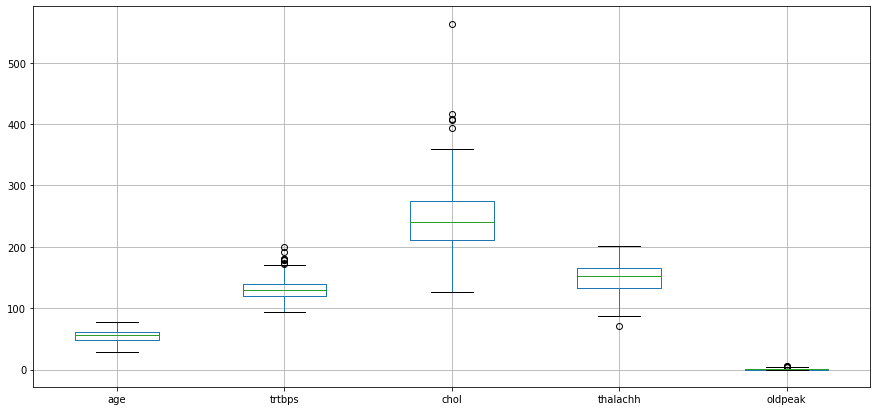

In [12]:

# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,7))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])  

In [13]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q3",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
        
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list


for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalachh attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [14]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])

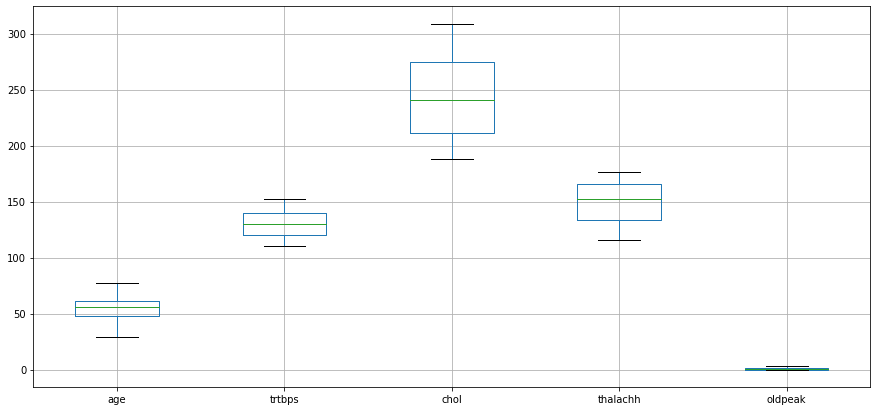

In [15]:
# verifying again with boxplot

plt.figure(figsize=(15,7))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']);

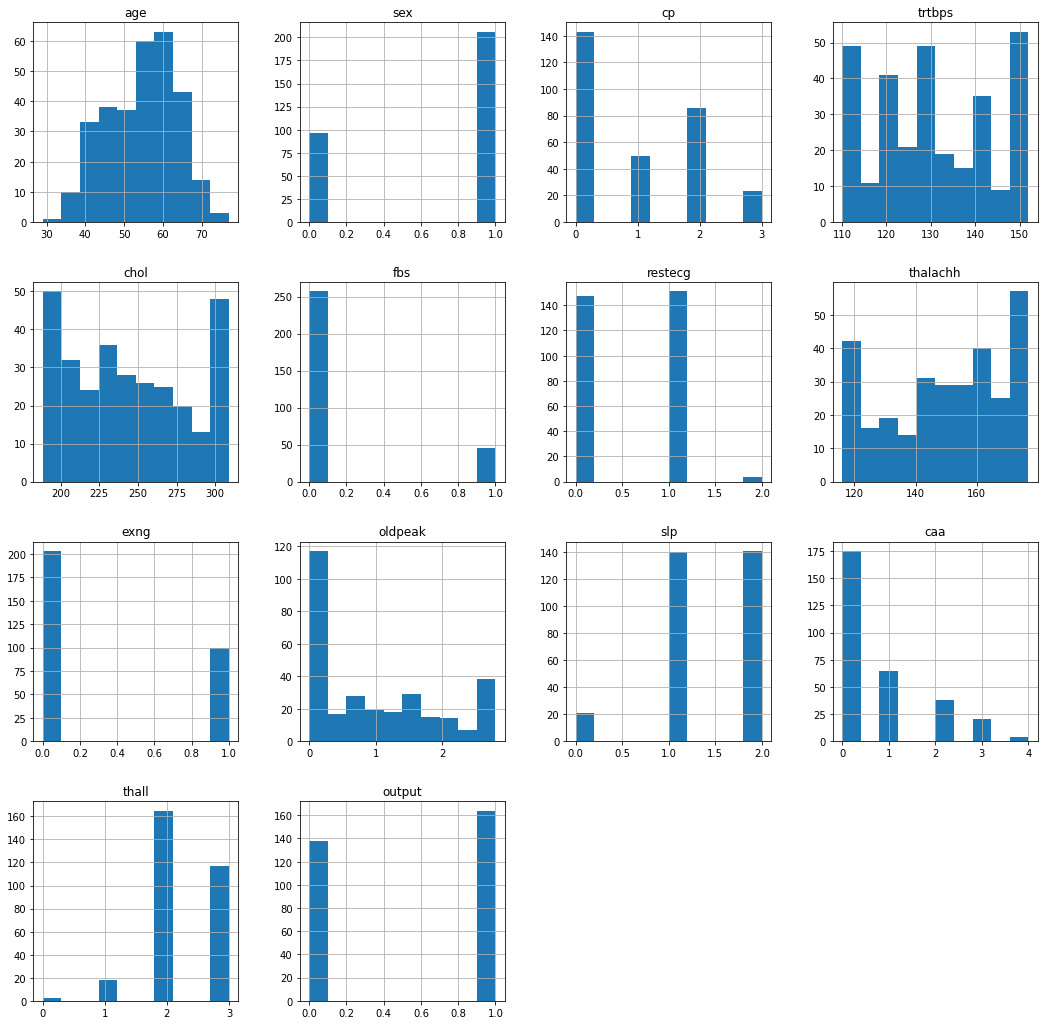

In [21]:
df.hist(figsize=(18,18))
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

    Category           Blood pressure

    Optimal               < 120

    Normal                120–129

    High normal          130–139

    Grade 1 hypertension    140–159

    Grade 2 hypertension    160–179

    Grade 3 hypertension     ≥ 180

In [17]:
#Gender
df.sex.value_counts().to_frame()

,sex
1,206
0,96


In [18]:

#Fasting blood sugar
df.fbs.value_counts().to_frame()

,fbs
0,257
1,45


In [21]:
#Exercise-induced angina
df.exng.value_counts().to_frame()

,exng
0,203
1,99


In [28]:
from sklearn.impute import KNNImputer

In [29]:
df['thall'] = df['thall'].replace({0 : np.nan})

In [30]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['thall'] = df['thall'].round()

In [31]:
df['thall'].unique()


array([1., 2., 3.])

In [32]:
print(df.iloc[48]['thall'],df.iloc[280]['thall'])


3.0 2.0


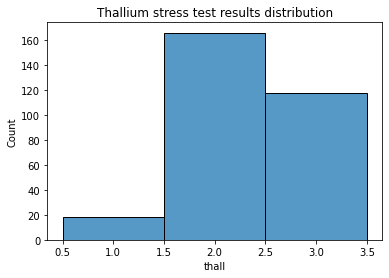

In [33]:
#Thallium stress test
sns.histplot(df.thall, discrete=True)
plt.title('Thallium stress test results distribution')
plt.show()

In [34]:
#The chance of heart attack
df.output.value_counts().to_frame()

,output
1.0,164
0.0,138


In [35]:
df.output.value_counts(normalize=True).to_frame()*100

,output
1.0,54.304636
0.0,45.695364


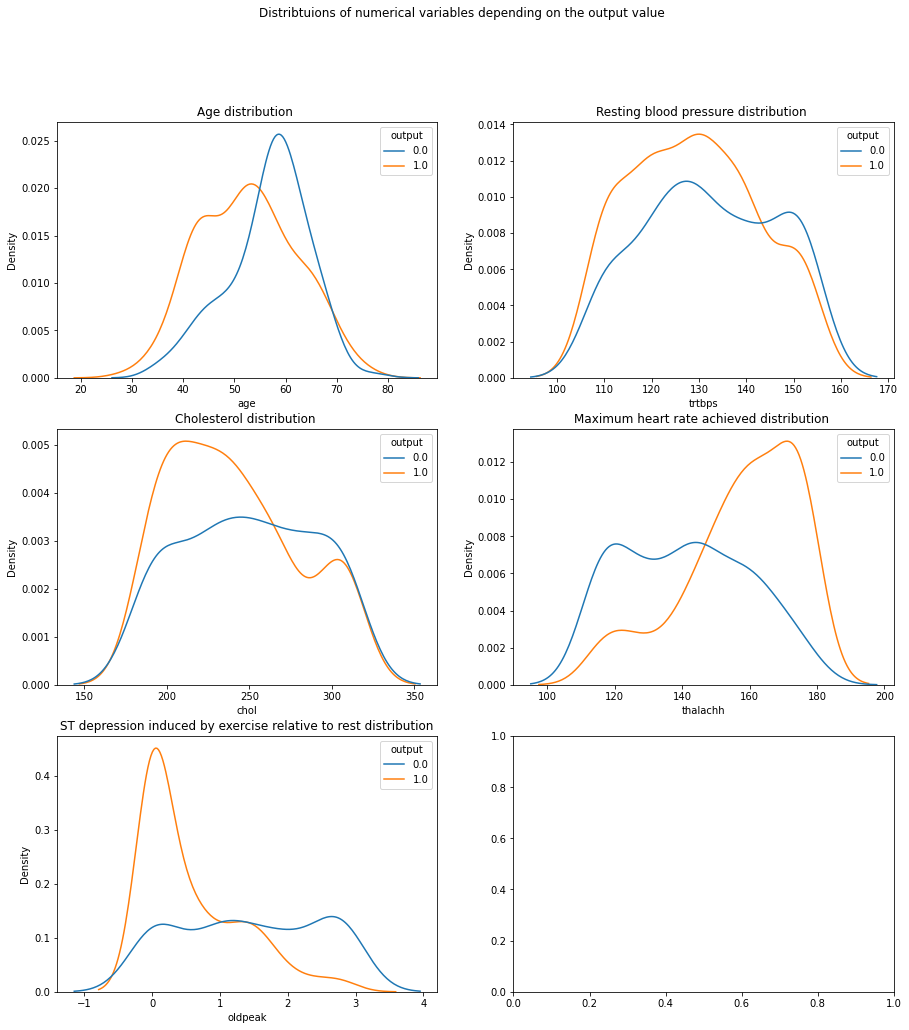

In [36]:
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=df, x='chol', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=df, x='oldpeak', hue='output', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
plt.suptitle('Distribtuions of numerical variables depending on the output value')
plt.show()

#### 1.From the distributions, it can be observed that cholesterol level and blood pressure do not affect the chance of heart attack.

#### 2.Another interesting observation is that relatively younger people more prone to have a heart attack.

#### 3.Maximum heart rate achieved and ST depression induced by exercise relative to rest have an ifluence on the output.

#### Our dataset is built the way when the low categorical value means a good condition, and high categorical value means a bad condition (exng is equal to 0 when no angina, restecg is equal to 0 when normal results). Only one exception is thall feature. Let's change this by mapping.

In [37]:
df['thall'] = df['thall'].map({3 : 0, 1 : 2, 2 : 1})

Now we have the following labels:

0 = normal 1 = reversable defect 2 = fixed defect

4 of our categorical features (cp, restecg, exng, and thall) can be considered as analyzes with relatively simple interpretation for us. And taking into account the encoding system, the lower the value - the better the health condition. So we can assume that combination of these parameters can affect the target. For example, let's check the patients that have the best health condition based on these features

In [38]:
df.query('cp == 0 and restecg == 0 and exng == 0 and thall == 0')['output'].value_counts()


0.0    13
Name: output, dtype: int64

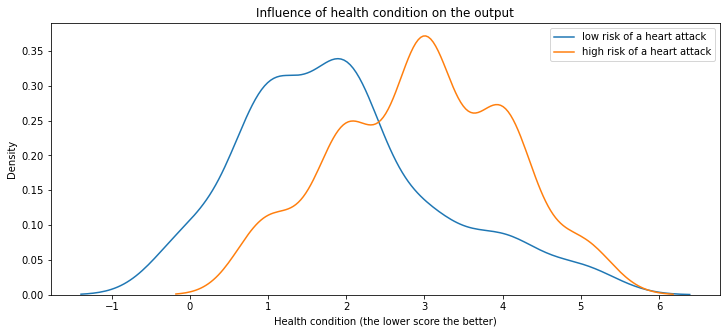

In [39]:
plt.figure(figsize=(12,5))
df_0 = df.query('output == 0')
df_1 = df.query('output == 1')
sns.kdeplot(df_0.cp + df_0.restecg + df_0.exng + df_0.thall, label='low risk of a heart attack')
sns.kdeplot(df_1.cp + df_1.restecg + df_1.exng + df_1.thall, label='high risk of a heart attack')
plt.title('Influence of health condition on the output')
plt.xlabel('Health condition (the lower score the better)')
plt.legend()
plt.show()

### The conclusion is that people with good health condition has a lower chance to a heart attack.

In [23]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283677,0.195000,0.119492,-0.111590,-0.381654,0.093216,0.226103,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.053748,-0.153093,0.046022,-0.060351,-0.050455,0.143460,0.117332,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.062575,-0.095335,0.096018,0.041561,0.300285,-0.392937,-0.139307,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283677,-0.053748,0.062575,1.000000,0.123476,0.152130,-0.112767,-0.042649,0.040571,0.157829,-0.089761,0.104298,0.046673,-0.116250
chol,0.195000,-0.153093,-0.095335,0.123476,1.000000,0.013878,-0.136402,-0.029510,0.089094,0.033175,0.002478,0.112991,0.097366,-0.118376
fbs,0.119492,0.046022,0.096018,0.152130,0.013878,1.000000,-0.083081,0.003196,0.024729,0.016259,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.112767,-0.136402,-0.083081,1.000000,0.061055,-0.068807,-0.071015,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.381654,-0.050455,0.300285,-0.042649,-0.029510,0.003196,0.061055,1.000000,-0.401085,-0.398188,0.399872,-0.227638,-0.097095,0.421322
exng,0.093216,0.143460,-0.392937,0.040571,0.089094,0.024729,-0.068807,-0.401085,1.000000,0.308973,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.226103,0.117332,-0.139307,0.157829,0.033175,0.016259,-0.071015,-0.398188,0.308973,1.000000,-0.572834,0.221493,0.203506,-0.440475


Text(0.5, 1.0, 'Correlation map')

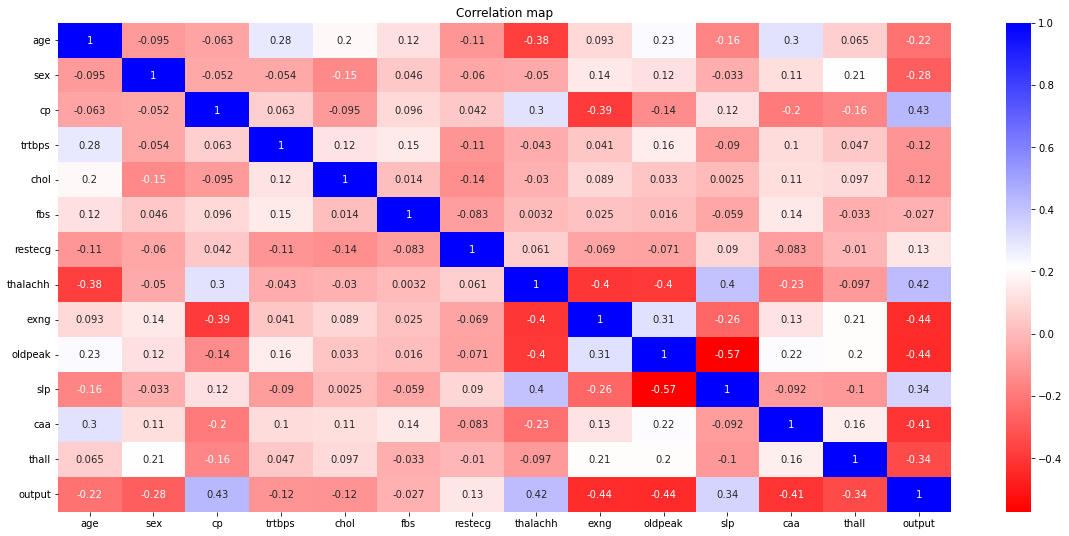

In [40]:
#Finding the correlation

plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr_r');
plt.title("Correlation map")

### From the above heatmap we can observe that the features 'cp', 'thalachh', 'exng', 'oldpeak' and 'caa' are highly correlated to output (target variable).

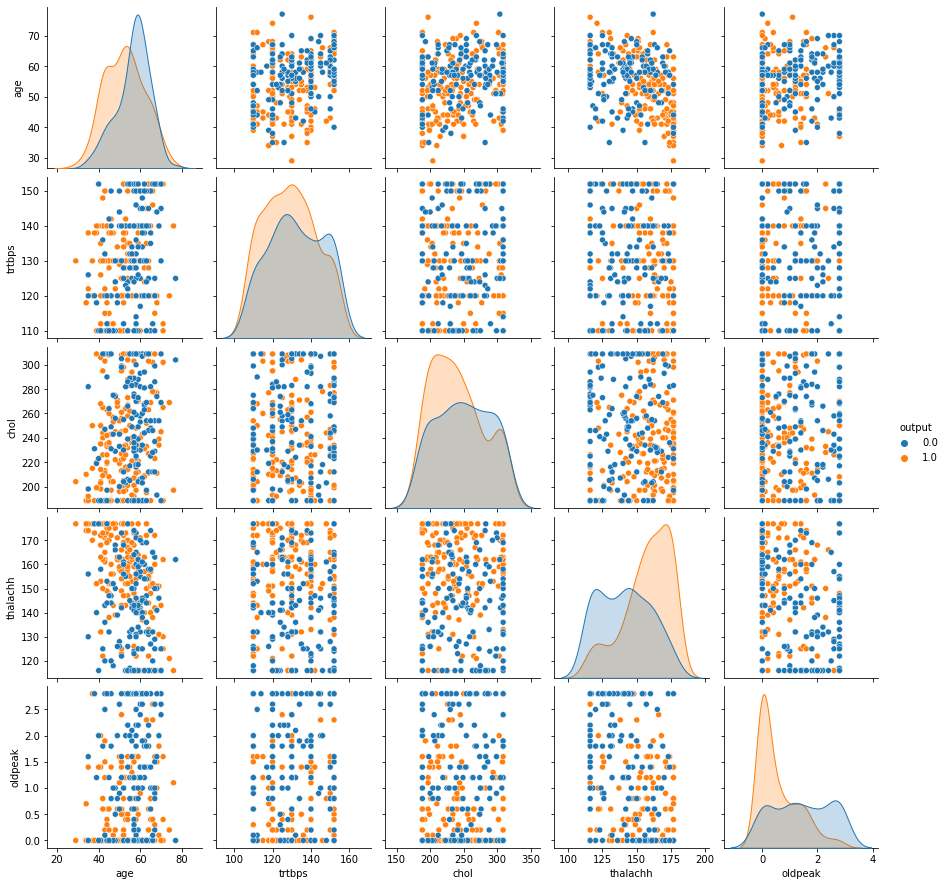

In [41]:
# pairplot for numeric columns

sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')

### Conclusion (Visualization):

1.The majority of the patients are older than 40.

2.In the dataset there are 2 times more males than females.

3.54.3% of the patients have a high risk of heart attack, 45.7% low risk of a heart attack.

4.Age distribution of patients from the high-risk group has a peak at 57-58 ages.

5.Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.

6.The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels

### Feature Scaling

In [42]:

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
df[['age','trtbps','chol','thalachh','oldpeak']]=scale.fit_transform(df[['age','trtbps','chol','thalachh','oldpeak']])

In [43]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,3.0,0.833333,0.370124,1.0,0.0,0.559211,0.0,0.821429,0.0,0.0,2,1.0
1,0.166667,1.0,2.0,0.476190,0.511203,0.0,1.0,1.000000,0.0,1.000000,0.0,0.0,1,1.0
2,0.250000,0.0,1.0,0.476190,0.129461,0.0,0.0,0.921053,0.0,0.500000,2.0,0.0,1,1.0
3,0.562500,1.0,1.0,0.238095,0.395021,0.0,1.0,1.000000,0.0,0.285714,2.0,0.0,1,1.0
4,0.583333,0.0,0.0,0.238095,1.000000,0.0,1.0,0.773026,1.0,0.214286,2.0,0.0,1,1.0


### Data Preparation

In [44]:
from sklearn.model_selection import train_test_split # Import train_test_split function


In [45]:
feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg','fbs','thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[feature_cols] # Features
y = df.output # Target variable

In [46]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) # 80% training and 20% test

In [47]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier #Extreme Gradient Boost
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

### Logistic Regression

In [48]:
# Logistic Regression

clf = LogisticRegression(random_state =1) 

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
lr_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",lr_accuracy,'%')

lr_precision = round(precision_score(y_test, y_pred)*100,2)
lr_recall = round(recall_score(y_test, y_pred)*100,2)
lr_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',lr_precision,'%')
print('\nRecall: ',lr_recall,'%')
print('\nF1 Score:',lr_fScore,'%')

Confusion matrix:
 [[18  5]
 [ 3 35]]

Accuracy: 86.89 %

Precision:  87.5 %

Recall:  92.11 %

F1 Score: 89.74 %


### Random Forest

In [49]:
# Random Forest

clf=RandomForestClassifier(n_estimators=100,random_state =1)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',c_matrix)

# Accuracy
rf_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",rf_accuracy,'%')

rf_precision = round(precision_score(y_test, y_pred)*100,2)
rf_recall = round(recall_score(y_test, y_pred)*100,2)
rf_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',rf_precision,'%')
print('\nRecall: ',rf_recall,'%')
print('\nF1 Score:',rf_fScore,'%')

Confusion matrix:
 [[20  3]
 [ 6 32]]

Accuracy: 85.25 %

Precision:  91.43 %

Recall:  84.21 %

F1 Score: 87.67 %


### XGBoost

In [50]:
# XGBoost

clf=XGBClassifier(n_estimators=30,random_state =1)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Confusion matrix
c_matrix= confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',c_matrix)

# Accuracy
xgb_accuracy=round(metrics.accuracy_score(y_test, y_pred)*100,2)
print("\nAccuracy:",xgb_accuracy,'%')

xgb_precision = round(precision_score(y_test, y_pred)*100,2)
xgb_recall = round(recall_score(y_test, y_pred)*100,2)
xgb_fScore=round(f1_score(y_test, y_pred)*100,2)


print('\nPrecision: ',xgb_precision,'%')
print('\nRecall: ',xgb_recall,'%')
print('\nF1 Score:',xgb_fScore,'%')

[18:59:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Confusion matrix:
 [[21  2]
 [ 4 34]]

Accuracy: 90.16 %

Precision:  94.44 %

Recall:  89.47 %

F1 Score: 91.89 %


### Model Evaluation

In [51]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Extreme Gradient Boost'],
                    'Accuracy %':[lr_accuracy,rf_accuracy,xgb_accuracy],
                    'Precision %':[lr_precision,rf_precision,xgb_precision],
                    'Recall %':[lr_recall,rf_recall,xgb_recall],
                    'F1 Score %':[lr_fScore,rf_fScore,xgb_fScore]})

model_ev.sort_values(by='Accuracy %',ignore_index=True,inplace=True)
model_ev

,Model,Accuracy %,Precision %,Recall %,F1 Score %
0,Random Forest,85.25,91.43,84.21,87.67
1,Logistic Regression,86.89,87.50,92.11,89.74
2,Extreme Gradient Boost,90.16,94.44,89.47,91.89


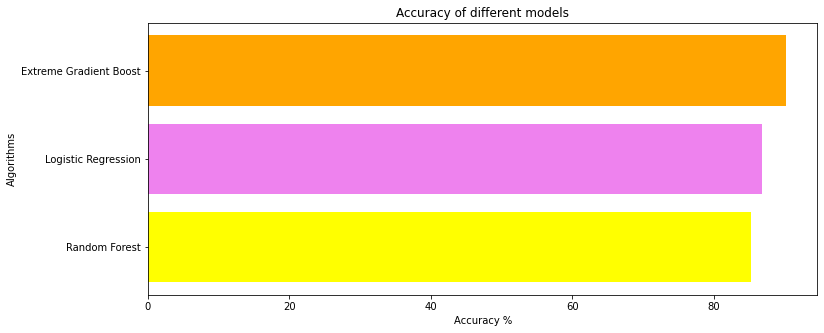

In [52]:
# Barplot for Accuracy of different models

plt.figure(figsize=(12,5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev['Model'],model_ev['Accuracy %'],color=['yellow','violet','orange'])
plt.show()